In [1]:
pip install FlowGrid

  Stored in directory: C:\Users\Xiunan\AppData\Local\pip\Cache\wheels\bf\ff\83\72f5d6198c5d70956ac89cae859a58e75ac64ecf3ae78fc6f1
Successfully built FlowGrid
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scanpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
from time import time
import FlowGrid as fg
import scanpy.api as sc
import sys
import warnings
warnings.filterwarnings('ignore')
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

In [4]:
adata = sc.read('~/sc_endoderm_all_cells.h5ad')

In [5]:
#AnnData has metadata stored in the obeservations
adata

AnnData object with n_obs × n_vars = 113051 × 20897 
    obs: 'Cluster', 'Timepoint', 'CellType'

In [6]:
#Basic filtering
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 64 genes that are detected in less than 3 cells


In [7]:
#Normalization
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)
adata.raw = adata

In [8]:
#Highly variable genes selection
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var['highly_variable']]

--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [9]:
#PCA to 5 dimensions#
sc.tl.pca(adata, n_comps=5)

Note that scikit-learn's randomized PCA might not be exactly reproducible across different computational platforms. For exact reproducibility, choose `svd_solver='arpack'.` This will likely become the Scanpy default in the future.
computing PCA with n_comps = 5
computing PCA on highly variable genes


Trying to set attribute `.obsm` of view, making a copy.


    finished (0:00:09.21)


In [10]:
#using FlowGrid automatically

#fg.autoFlowGrid(adata, setN, binN, Eps)
    # setN - Number of parameters to be recommended
    # binN - Default [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
    # Eps  - Default [1.2, 1.6, 1.9, 2.1, 2.3, 2.7]
#example: recomm_parameters = fg.autoFlowGrid(adata, 5, [10, 11, 12], [1.2, 1.6])

recomm_parameters = fg.autoFlowGrid(adata, 5)

autoFlowGrid completed in : 63.144 seconds.
96 sets of parameters are stored.
5 sets of parameters are recommended.



In [11]:
recomm_parameters

['binN_14_eps_1.2_FlowGrid',
 'binN_12_eps_1.2_FlowGrid',
 'binN_13_eps_1.2_FlowGrid',
 'binN_11_eps_1.2_FlowGrid',
 'binN_10_eps_1.2_FlowGrid']

In [12]:
#neighbor graph
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=5)
#umap
sc.tl.umap(adata)

computing neighbors
    using 'X_pca' with n_pcs = 5
    finished (0:00:40.98) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix
computing UMAP
    using 'X_pca' with n_pcs = 5
    finished (0:01:52.11) --> added
    'X_umap', UMAP coordinates (adata.obsm)


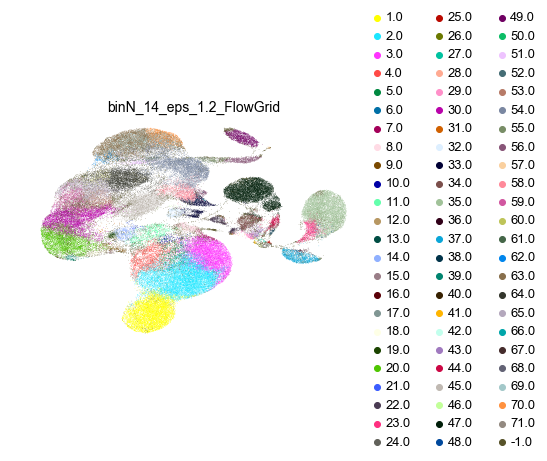

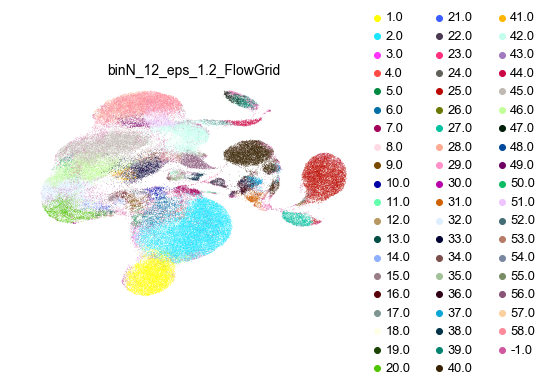

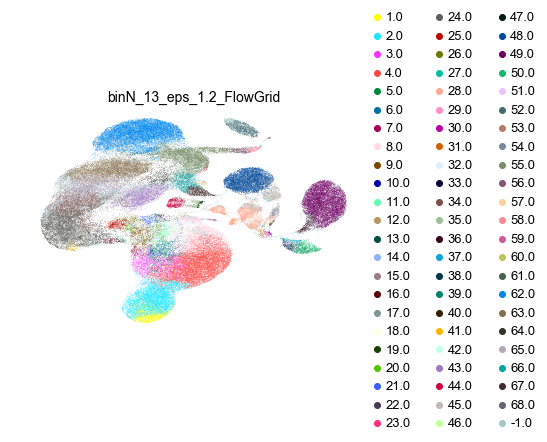

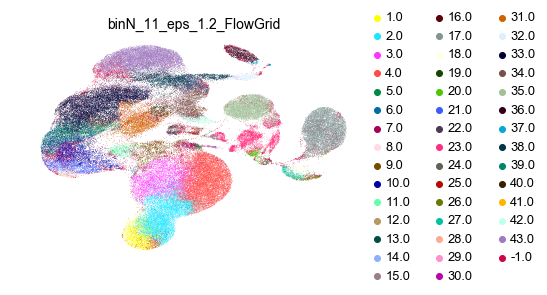

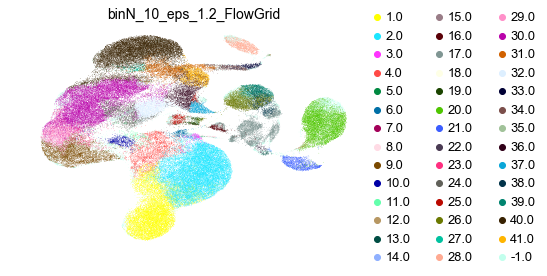

In [13]:
#results of recommended parameters
for i in range(len(recomm_parameters)):
    sc.pl.umap(adata, color=recomm_parameters[i],frameon =False)

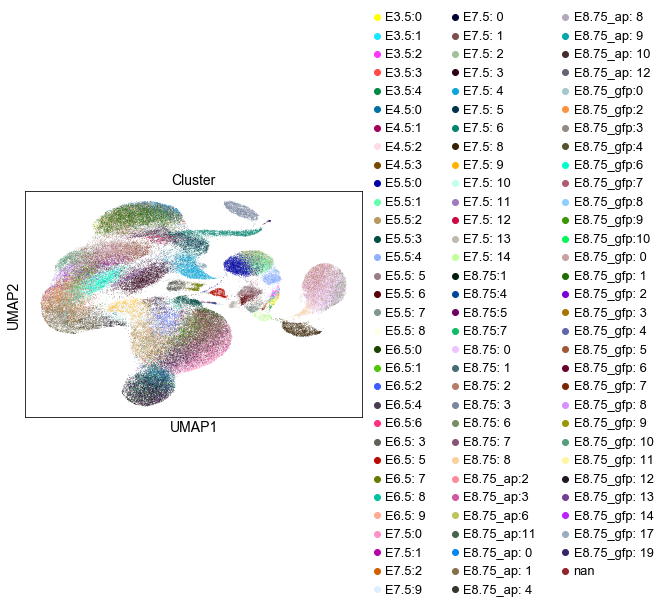

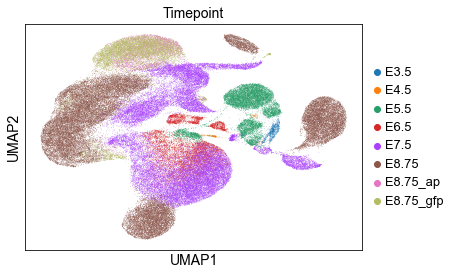

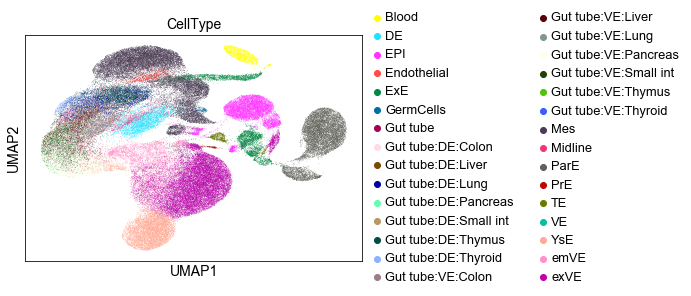

In [14]:
#plotting results of reference label for comparison
sc.pl.umap(adata, color=['Cluster'])
sc.pl.umap(adata, color=['Timepoint'])
sc.pl.umap(adata, color=['CellType'])

In [16]:
#computing adjusted Rand index when there are reference labels

#fg.AdjustedRandScore(adata, predlabel_list, reflabel_list)
    # predlabel_list - The cluster label list to evaluate
    # reflabel_list  - The ref label list to be used as a reference
#example: fg.AdjustedRandScore(adata, ['binN_14_eps_1.2_FlowGrid', 'louvain'], ['Cluster', 'Timepoint', 'CellType'])

fg.AdjustedRandScore(adata,recomm_parameters,['Cluster', 'Timepoint', 'CellType'])

binN_14_eps_1.2_FlowGrid vs.Cluster ARI:0.3517
binN_14_eps_1.2_FlowGrid vs.Timepoint ARI:0.1972
binN_14_eps_1.2_FlowGrid vs.CellType ARI:0.5041
binN_12_eps_1.2_FlowGrid vs.Cluster ARI:0.3196
binN_12_eps_1.2_FlowGrid vs.Timepoint ARI:0.2419
binN_12_eps_1.2_FlowGrid vs.CellType ARI:0.6196
binN_13_eps_1.2_FlowGrid vs.Cluster ARI:0.3513
binN_13_eps_1.2_FlowGrid vs.Timepoint ARI:0.2078
binN_13_eps_1.2_FlowGrid vs.CellType ARI:0.5173
binN_11_eps_1.2_FlowGrid vs.Cluster ARI:0.3016
binN_11_eps_1.2_FlowGrid vs.Timepoint ARI:0.2016
binN_11_eps_1.2_FlowGrid vs.CellType ARI:0.524
binN_10_eps_1.2_FlowGrid vs.Cluster ARI:0.2732
binN_10_eps_1.2_FlowGrid vs.Timepoint ARI:0.2175
binN_10_eps_1.2_FlowGrid vs.CellType ARI:0.5491


In [17]:
#AnnData contains all the results of autoFlowGrid
adata

AnnData object with n_obs × n_vars = 113051 × 1932 
    obs: 'Cluster', 'Timepoint', 'CellType', 'n_genes', 'n_counts', 'binN_10_eps_1.2_FlowGrid', 'binN_10_eps_1.6_FlowGrid', 'binN_10_eps_1.9_FlowGrid', 'binN_10_eps_2.1_FlowGrid', 'binN_10_eps_2.3_FlowGrid', 'binN_10_eps_2.7_FlowGrid', 'binN_11_eps_1.2_FlowGrid', 'binN_11_eps_1.6_FlowGrid', 'binN_11_eps_1.9_FlowGrid', 'binN_11_eps_2.1_FlowGrid', 'binN_11_eps_2.3_FlowGrid', 'binN_11_eps_2.7_FlowGrid', 'binN_12_eps_1.2_FlowGrid', 'binN_12_eps_1.6_FlowGrid', 'binN_12_eps_1.9_FlowGrid', 'binN_12_eps_2.1_FlowGrid', 'binN_12_eps_2.3_FlowGrid', 'binN_12_eps_2.7_FlowGrid', 'binN_13_eps_1.2_FlowGrid', 'binN_13_eps_1.6_FlowGrid', 'binN_13_eps_1.9_FlowGrid', 'binN_13_eps_2.1_FlowGrid', 'binN_13_eps_2.3_FlowGrid', 'binN_13_eps_2.7_FlowGrid', 'binN_14_eps_1.2_FlowGrid', 'binN_14_eps_1.6_FlowGrid', 'binN_14_eps_1.9_FlowGrid', 'binN_14_eps_2.1_FlowGrid', 'binN_14_eps_2.3_FlowGrid', 'binN_14_eps_2.7_FlowGrid', 'binN_15_eps_1.2_FlowGrid', 'binN_15_eps

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:01:44.00) --> found 26 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


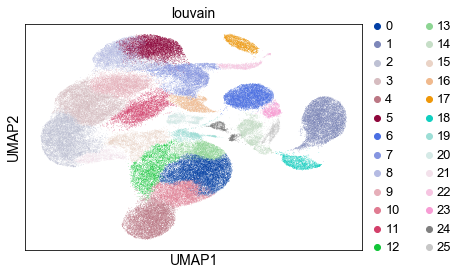

In [18]:
#Scanpy louvain clustering for comparison
sc.tl.louvain(adata)
sc.pl.umap(adata, color=['louvain'])

In [19]:
#louvain result vs. ref labels
fg.AdjustedRandScore(adata, ['louvain'], ['Cluster', 'Timepoint', 'CellType'])

louvain vs.Cluster ARI:0.3648
louvain vs.Timepoint ARI:0.2248
louvain vs.CellType ARI:0.4891


In [20]:
#FlowGrid result vs. louvain
fg.AdjustedRandScore(adata, recomm_parameters, ['louvain'])

binN_14_eps_1.2_FlowGrid vs.louvain ARI:0.6156
binN_12_eps_1.2_FlowGrid vs.louvain ARI:0.6105
binN_13_eps_1.2_FlowGrid vs.louvain ARI:0.6294
binN_11_eps_1.2_FlowGrid vs.louvain ARI:0.5812
binN_10_eps_1.2_FlowGrid vs.louvain ARI:0.5408


Running time: 0.186 Seconds.


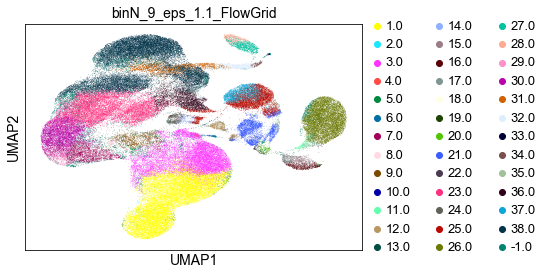

In [24]:
#running FlowGrid with specified parameters is ultra fast

#fg.cluster(adata, binN, eps)
    # binN - Number of bins for grid
    # eps  - Maximun distance between two bins
#example: fg.cluster(adata, 10, 1.2) 

t1 = time()
fg.cluster(adata, 9, 1.1)
print("Running time: " + str(round(time()-t1,3)) + ' Seconds.')

#visualization
sc.pl.umap(adata, color=['binN_9_eps_1.1_FlowGrid'])

In [25]:
#keeping only valuable results

#fg.keep_labels(adata, remain_list)
    # remain_list - the parameters to be reserved
#example: fg.keep_labels(adata, ['binN_9_eps_1.1_FlowGrid', 'binN_11_eps_1.2_FlowGrid'])

fg.keep_labels(adata, recomm_parameters)

In [26]:
#AnnData is much more clean now!
adata

AnnData object with n_obs × n_vars = 113051 × 1932 
    obs: 'Cluster', 'Timepoint', 'CellType', 'n_genes', 'n_counts', 'binN_10_eps_1.2_FlowGrid', 'binN_11_eps_1.2_FlowGrid', 'binN_12_eps_1.2_FlowGrid', 'binN_13_eps_1.2_FlowGrid', 'binN_14_eps_1.2_FlowGrid', 'louvain'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca', 'neighbors', 'binN_14_eps_1.2_FlowGrid_colors', 'binN_12_eps_1.2_FlowGrid_colors', 'binN_13_eps_1.2_FlowGrid_colors', 'binN_11_eps_1.2_FlowGrid_colors', 'binN_10_eps_1.2_FlowGrid_colors', 'Cluster_colors', 'Timepoint_colors', 'CellType_colors', 'louvain', 'louvain_colors', 'binN_9_eps_1.1_FlowGrid_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [27]:
adata.write('~/FlowGrid_sc_endoderm_all_cells.h5ad', compression='gzip')